# FIGURES

All the graphs in the paper are produced from this notebook.

We will try to make useful figures and graphs in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl

In [3]:
#this is for making figures compatible with the latex format

mpl.use("pgf")
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
%matplotlib inline

In [5]:
#lets create a folder for figures

data_dirname='Figures'

if not os.path.exists(data_dirname):
    os.mkdir(data_dirname)
    print("Directory " , data_dirname ,  " Created ")
else:    
    print("Directory " , data_dirname ,  " already exists")


Directory  Figures  already exists


In [6]:
#figure for unit size reduction method

first_layer=300
second_layer=100
layer_pruning_rounds=11
total_unit_size=first_layer+second_layer
pruning_percentage=0.2

In [7]:
unit_list=list()
remaining=100
for i in range(layer_pruning_rounds):
    remaining-=remaining*pruning_percentage
    unit_list.append(round(remaining,2))
print(unit_list)

[80.0, 64.0, 51.2, 40.96, 32.77, 26.21, 20.97, 16.78, 13.42, 10.74, 8.59]


In [8]:
unit_list_fix=list()
remaining=100
for i in range(layer_pruning_rounds):
    remaining-=9
    unit_list_fix.append(round(remaining,2))
print(unit_list_fix)

[91, 82, 73, 64, 55, 46, 37, 28, 19, 10, 1]


### Decided not to use this plot in the end.

This plot explains why we choose a iterative reducing method rather than fix rate method.

With same amount of rounds, we can focus more on the smaller networks.

C:\Users\Murat\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


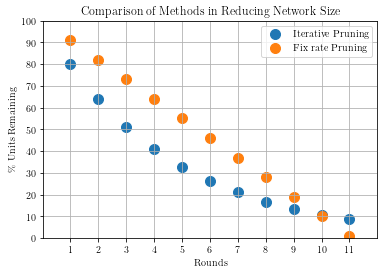

In [9]:
plt.scatter(range(1,layer_pruning_rounds+1),unit_list,label='Iterative Pruning',s=100)
plt.scatter(range(1,layer_pruning_rounds+1),unit_list_fix,label='Fix rate Pruning',s=100)


plt.title('Comparison of Methods in Reducing Network Size')
plt.ylabel('\% Units Remaining')
plt.xlabel('Rounds')#,fontsize=14,color='red')
plt.legend()


plt.xticks(np.arange(1,layer_pruning_rounds+1,1))
plt.yticks(np.arange(0,110,10))

#to hide the certain axis
#x.spines['right'].set_visible(False)


#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([0,12,0,100],option='auto')




plt.grid()

plt.savefig('{}/test2.png'.format(data_dirname))

plt.savefig('{}/deneme2.pgf'.format(data_dirname))



plt.show()





# Analysis of the results


In [10]:
df=pd.read_csv('Data/Results.csv')

In [11]:
#sanity check for the number of the rounds

for s in [1,2]:
    for p in [0.1,0.2]:
        for r in [1,2,3,4,5]:
            if int(df[(df['strategy']==s) & (df['round']==r) & (df['pruning_rate']==p)].size/15)!=12:
                if p==0.1 and s==2:
                    continue
                else:
                    print('Strategy {}, round {} , pruning rate {} something wrong'.format(s,r,p))


In [12]:
#We need to remove the colums with 300 layers. That was just for experiment. Not for results.

df=df[df['units_first_layer']!=300]

In [14]:
# lets introduce a column

df['units_left_percentage']=(df['units_first_layer']+df['units_second_layer'])/4

In [15]:
df.keys()

Index(['index', 'mean_test_acc', 'mean_val_loss', 'mean_val_loss_iteration',
       'min_val_loss', 'min_val_loss_acc', 'min_val_loss_iteration',
       'min_val_loss_per_pruned', 'patience', 'pruning_rate', 'round',
       'strategy', 'super_winning_ticket_percentage', 'units_first_layer',
       'units_second_layer', 'winning_ticket_percentage',
       'units_left_percentage'],
      dtype='object')

In [16]:
df_strategy=df.copy()
df_strategy=df[['strategy','round','units_left_percentage','super_winning_ticket_percentage',
            'winning_ticket_percentage','mean_val_loss_iteration','mean_test_acc','pruning_rate']][df_strategy['pruning_rate']==0.2]

In [17]:
df_strategy[(df_strategy['strategy']==1) & (df_strategy['units_left_percentage']<8)]

,strategy,round,units_left_percentage,super_winning_ticket_percentage,winning_ticket_percentage,mean_val_loss_iteration,mean_test_acc,pruning_rate
11,1,1,7.75,0.0,0.000000,NaN,NaN,0.2
23,1,2,7.75,0.0,0.133333,6650.000000,0.951800,0.2
35,1,3,7.75,0.0,0.266667,6725.000000,0.949525,0.2
47,1,4,7.75,0.0,0.400000,8883.333333,0.946667,0.2
59,1,5,7.75,0.0,0.066667,8300.000000,0.950400,0.2


In [18]:
#defining the mean, min, and max of the rounds for the errorbars

df_min=df_strategy.groupby(['strategy','units_left_percentage'],as_index=False)[['super_winning_ticket_percentage',
                                                                       'winning_ticket_percentage',
                                                                             'mean_val_loss_iteration',
                                                                             'mean_test_acc']].min()

#Rounding the values
for key in df_min.keys():
    df_min[key]=np.round(df_min[key],3)

df_mean=df_strategy.groupby(['strategy','units_left_percentage'],as_index=False)[['super_winning_ticket_percentage',
                                                                       'winning_ticket_percentage',
                                                                              'mean_val_loss_iteration',
                                                                             'mean_test_acc']].mean()
#Rounding the values
for key in df_mean.keys():
    df_mean[key]=np.round(df_mean[key],3)


df_max=df_strategy.groupby(['strategy','units_left_percentage'],as_index=False)[['super_winning_ticket_percentage',
                                                                       'winning_ticket_percentage',
                                                                             'mean_val_loss_iteration',
                                                                             'mean_test_acc']].max()

#Rounding the values
for key in df_max.keys():
    df_max[key]=np.round(df_max[key],3)


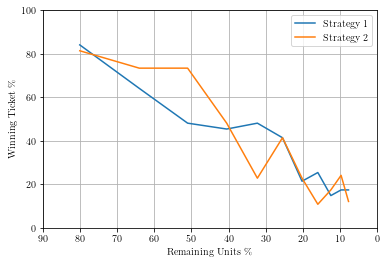

In [19]:
#this figure is for winning_ticket_percentages for different strategies
#this is just a simple figure without the errorbars. Mean values are used.

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].tolist()
y_1=(df_mean['winning_ticket_percentage'][df_mean['strategy']==1]*100).tolist()
y_2=(df_mean['winning_ticket_percentage'][df_mean['strategy']==2]*100).tolist()

plt.xlabel('Remaining Units \%')
plt.ylabel('Winning Ticket \%')

plt.plot(x_1,y_1,label='Strategy 1')
plt.plot(x_1,y_2,label='Strategy 2')

plt.legend()

plt.xlim(90,0)
plt.ylim(0,100)

plt.xticks(np.arange(0,100,10))

plt.grid()

plt.show()

# COMPARISON OF STRATEGIES

## The Winning Ticket Percentage

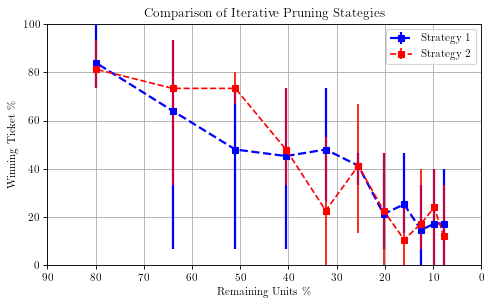

In [20]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=(df_mean['winning_ticket_percentage'][df_mean['strategy']==1]*100).to_numpy()
y_1_min=(df_min['winning_ticket_percentage'][df_min['strategy']==1]*100).to_numpy()
y_1_max=(df_max['winning_ticket_percentage'][df_max['strategy']==1]*100).to_numpy()

y_2=(df_mean['winning_ticket_percentage'][df_mean['strategy']==2]*100).to_numpy()
y_2_min=(df_min['winning_ticket_percentage'][df_min['strategy']==2]*100).to_numpy()
y_2_max=(df_max['winning_ticket_percentage'][df_max['strategy']==2]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.title('Comparison of Iterative Pruning Stategies')
plt.xlabel('Remaining Units \%')
plt.ylabel('Winning Ticket \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1',color='b',linewidth=2,linestyle='--')
plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Strategy 2',color='r',linestyle='--')

plt.xlim(90,0)
plt.ylim(0,100)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()

plt.show()

## The Super Winning Ticket Percentage

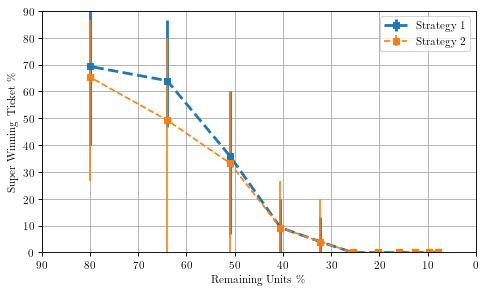

In [21]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=(df_mean['super_winning_ticket_percentage'][df_mean['strategy']==1]*100).to_numpy()
y_1_min=(df_min['super_winning_ticket_percentage'][df_min['strategy']==1]*100).to_numpy()
y_1_max=(df_max['super_winning_ticket_percentage'][df_max['strategy']==1]*100).to_numpy()

y_2=(df_mean['super_winning_ticket_percentage'][df_mean['strategy']==2]*100).to_numpy()
y_2_min=(df_min['super_winning_ticket_percentage'][df_min['strategy']==2]*100).to_numpy()
y_2_max=(df_max['super_winning_ticket_percentage'][df_max['strategy']==2]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.xlabel('Remaining Units \%')
plt.ylabel('Super Winning Ticket \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1',linewidth=2.5,linestyle='--')
plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Strategy 2',linestyle='--')

plt.xlim(90,0)
plt.ylim(0,90)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()


plt.savefig('{}/Strategy_swt.png'.format(data_dirname))

plt.savefig('{}/Strategy_swt.pgf'.format(data_dirname))


plt.show()

## Minimum Validation Loss Iteration

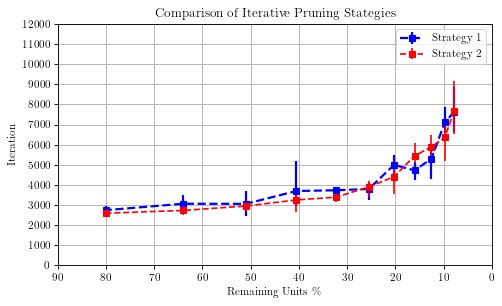

In [42]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=df_mean['mean_val_loss_iteration'][df_mean['strategy']==1].to_numpy()
y_1_min=df_min['mean_val_loss_iteration'][df_min['strategy']==1].to_numpy()
y_1_max=df_max['mean_val_loss_iteration'][df_max['strategy']==1].to_numpy()

y_2=df_mean['mean_val_loss_iteration'][df_mean['strategy']==2].to_numpy()
y_2_min=df_min['mean_val_loss_iteration'][df_min['strategy']==2].to_numpy()
y_2_max=df_max['mean_val_loss_iteration'][df_max['strategy']==2].to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.title('Comparison of Iterative Pruning Stategies')
plt.xlabel('Remaining Units \%')
plt.ylabel('Iteration')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1',color='b',linewidth=2,linestyle='--')
plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Strategy 2',color='r',linestyle='--')

plt.xlim(90,0)
#plt.ylim(0,10000)

plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,13000,1000))
plt.legend(loc='best')
plt.grid()

plt.show()

## Test Accuracies

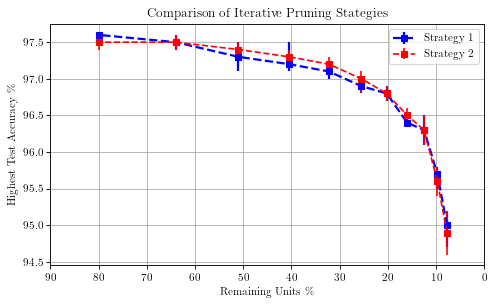

In [43]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=(df_mean['mean_test_acc'][df_mean['strategy']==1]*100).to_numpy()
y_1_min=(df_min['mean_test_acc'][df_min['strategy']==1]*100).to_numpy()
y_1_max=(df_max['mean_test_acc'][df_max['strategy']==1]*100).to_numpy()

y_2=(df_mean['mean_test_acc'][df_mean['strategy']==2]*100).to_numpy()
y_2_min=(df_min['mean_test_acc'][df_min['strategy']==2]*100).to_numpy()
y_2_max=(df_max['mean_test_acc'][df_max['strategy']==2]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.title('Comparison of Iterative Pruning Stategies')
plt.xlabel('Remaining Units \%')
plt.ylabel('Highest Test Accuracy \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1',color='b',linewidth=2,linestyle='--')
plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Strategy 2',color='r',linestyle='--')

plt.xlim(90,0)
#plt.ylim(0,90)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()

plt.show()

## Observation

Although it seems like strategy 2 has the upper hand, voting system might solve this.

In every for four of the variables, we will look at which strategy is better

In [45]:
str1=np.sum(df_mean['mean_test_acc'][df_mean['strategy']==1].to_numpy()>df_mean['mean_test_acc'][df_mean['strategy']==2].to_numpy())
str2=np.sum(df_mean['mean_test_acc'][df_mean['strategy']==1].to_numpy()<df_mean['mean_test_acc'][df_mean['strategy']==2].to_numpy())

print('For the Test Accuracy:')
print('strategy 1: {}, strategy 2: {}'.format(str1,str2))


For the Test Accuracy:
strategy 1: 3, strategy 2: 5


In [46]:
str1=np.sum(df_mean['mean_val_loss_iteration'][df_mean['strategy']==1].to_numpy()<df_mean['mean_val_loss_iteration'][df_mean['strategy']==2].to_numpy())
str2=np.sum(df_mean['mean_val_loss_iteration'][df_mean['strategy']==1].to_numpy()>df_mean['mean_val_loss_iteration'][df_mean['strategy']==2].to_numpy())

print('For the Iteration:')
print('strategy 1: {}, strategy 2: {}'.format(str1,str2))


For the Iteration:
strategy 1: 4, strategy 2: 7


In [47]:
str1=np.sum(df_mean['super_winning_ticket_percentage'][df_mean['strategy']==1].to_numpy()>df_mean['super_winning_ticket_percentage'][df_mean['strategy']==2].to_numpy())
str2=np.sum(df_mean['super_winning_ticket_percentage'][df_mean['strategy']==1].to_numpy()<df_mean['super_winning_ticket_percentage'][df_mean['strategy']==2].to_numpy())

print('For the Super Winning Ticket Percentage:')
print('strategy 1: {}, strategy 2: {}'.format(str1,str2))

For the Super Winning Ticket Percentage:
strategy 1: 3, strategy 2: 0


In [48]:
str1=np.sum(df_mean['winning_ticket_percentage'][df_mean['strategy']==1].to_numpy()>df_mean['winning_ticket_percentage'][df_mean['strategy']==2].to_numpy())
str2=np.sum(df_mean['winning_ticket_percentage'][df_mean['strategy']==1].to_numpy()<df_mean['winning_ticket_percentage'][df_mean['strategy']==2].to_numpy())

print('For the Winning Ticket Percentage:')
print('strategy 1: {}, strategy 2: {}'.format(str1,str2))


For the Winning Ticket Percentage:
strategy 1: 4, strategy 2: 6


## Results For Strategy Experiment

Both of the strategies performed equally in means of iteration and accuracy.

Strategy 2 has the upper hand in the winning tickets

However, Strategy 1 has better performance on finding super winning tickets. Since it was the point of this research we will try different pruning rate on strategy 1

# Experiment in Different Pruning Rates

In [49]:
df_prun=df.copy()
df_prun=df[['strategy','round','units_left_percentage','super_winning_ticket_percentage',
            'winning_ticket_percentage','mean_val_loss_iteration','mean_test_acc','pruning_rate']][df_prun['strategy']==1]

In [50]:
#defining the mean, min, and max of the rounds for the errorbars

df_min_prun=df_prun.groupby(['pruning_rate','units_left_percentage'],as_index=False)[['super_winning_ticket_percentage',
                                                                       'winning_ticket_percentage',
                                                                             'mean_val_loss_iteration',
                                                                             'mean_test_acc']].min()

#Rounding the values
for key in df_min_prun.keys():
    df_min_prun[key]=np.round(df_min_prun[key],3)

df_mean_prun=df_prun.groupby(['pruning_rate','units_left_percentage'],as_index=False)[['super_winning_ticket_percentage',
                                                                       'winning_ticket_percentage',
                                                                              'mean_val_loss_iteration',
                                                                             'mean_test_acc']].mean()
#Rounding the values
for key in df_mean_prun.keys():
    df_mean_prun[key]=np.round(df_mean_prun[key],3)


df_max_prun=df_prun.groupby(['pruning_rate','units_left_percentage'],as_index=False)[['super_winning_ticket_percentage',
                                                                       'winning_ticket_percentage',
                                                                             'mean_val_loss_iteration',
                                                                             'mean_test_acc']].max()

#Rounding the values
for key in df_max_prun.keys():
    df_max_prun[key]=np.round(df_max_prun[key],3)


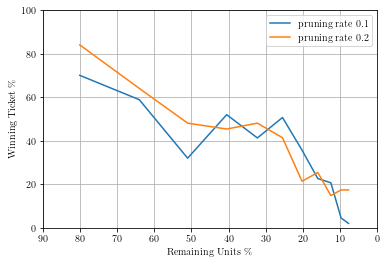

In [51]:
#this figure is for winning_ticket_percentages for different pruning rates
#this is just a simple figure without the errorbars. Avarage values are used.

x_1=df_mean_prun['units_left_percentage'][df_mean_prun['pruning_rate']==0.1].tolist()
y_1=(df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.1]*100).tolist()
y_2=(df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.2]*100).tolist()

plt.xlabel('Remaining Units \%')
plt.ylabel('Winning Ticket \%')

plt.plot(x_1,y_1,label='pruning rate 0.1')
plt.plot(x_1,y_2,label='pruning rate 0.2')

plt.legend()

plt.xlim(90,0)
plt.ylim(0,100)

plt.xticks(np.arange(0,100,10))

plt.grid()

plt.show()

## The Winning Ticket Percentage

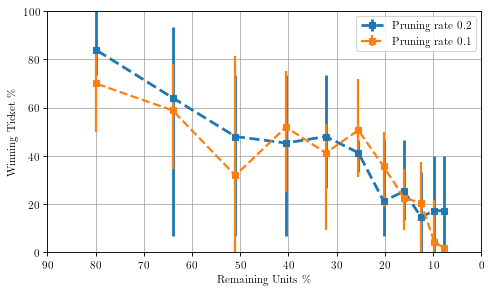

In [52]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean_prun['units_left_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()
y_1=(df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.1]*100).to_numpy()
y_1_min=(df_min_prun['winning_ticket_percentage'][df_min_prun['pruning_rate']==0.1]*100).to_numpy()
y_1_max=(df_max_prun['winning_ticket_percentage'][df_max_prun['pruning_rate']==0.1]*100).to_numpy()

y_2=(df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.2]*100).to_numpy()
y_2_min=(df_min_prun['winning_ticket_percentage'][df_min_prun['pruning_rate']==0.2]*100).to_numpy()
y_2_max=(df_max_prun['winning_ticket_percentage'][df_max_prun['pruning_rate']==0.2]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.xlabel('Remaining Units \%')
plt.ylabel('Winning Ticket \%')

plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Pruning rate 0.2',linewidth=2.5,linestyle='--')
plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Pruning rate 0.1',linewidth=2,linestyle='--')

plt.xlim(90,0)
plt.ylim(0,100)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()

plt.savefig('{}/Prun_wt.png'.format(data_dirname))

plt.savefig('{}/Prun_wt.pgf'.format(data_dirname))


plt.show()

## The Super Winning Ticket Percentage

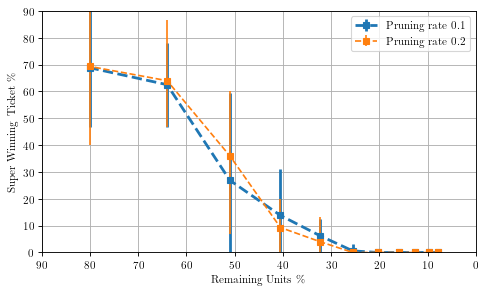

In [53]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean_prun['units_left_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()
y_1=(df_mean_prun['super_winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.1]*100).to_numpy()
y_1_min=(df_min_prun['super_winning_ticket_percentage'][df_min_prun['pruning_rate']==0.1]*100).to_numpy()
y_1_max=(df_max_prun['super_winning_ticket_percentage'][df_max_prun['pruning_rate']==0.1]*100).to_numpy()

y_2=(df_mean_prun['super_winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.2]*100).to_numpy()
y_2_min=(df_min_prun['super_winning_ticket_percentage'][df_min_prun['pruning_rate']==0.2]*100).to_numpy()
y_2_max=(df_max_prun['super_winning_ticket_percentage'][df_max_prun['pruning_rate']==0.2]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.xlabel('Remaining Units \%')
plt.ylabel('Super Winning Ticket \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Pruning rate 0.1',linewidth=2.5,linestyle='--')
plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Pruning rate 0.2',linestyle='--')

plt.xlim(90,0)
plt.ylim(0,90)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()

plt.savefig('{}/Prun_swt.png'.format(data_dirname))

plt.savefig('{}/Prun_swt.pgf'.format(data_dirname))


plt.show()

## The Minimum Validation Loss Iteration

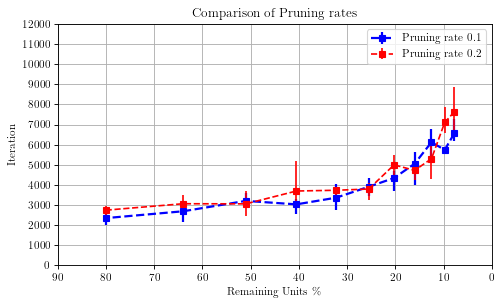

In [54]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean_prun['units_left_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()
y_1=df_mean_prun['mean_val_loss_iteration'][df_mean_prun['pruning_rate']==0.1].to_numpy()
y_1_min=df_min_prun['mean_val_loss_iteration'][df_min_prun['pruning_rate']==0.1].to_numpy()
y_1_max=df_max_prun['mean_val_loss_iteration'][df_max_prun['pruning_rate']==0.1].to_numpy()

y_2=df_mean_prun['mean_val_loss_iteration'][df_mean_prun['pruning_rate']==0.2].to_numpy()
y_2_min=df_min_prun['mean_val_loss_iteration'][df_min_prun['pruning_rate']==0.2].to_numpy()
y_2_max=df_max_prun['mean_val_loss_iteration'][df_max_prun['pruning_rate']==0.2].to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.title('Comparison of Pruning rates')
plt.xlabel('Remaining Units \%')
plt.ylabel('Iteration')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Pruning rate 0.1',color='b',linewidth=2,linestyle='--')
plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Pruning rate 0.2',color='r',linestyle='--')

plt.xlim(90,0)
#plt.ylim(0,10000)

plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,13000,1000))
plt.legend()
plt.grid()

plt.show()

## The Test accuracies

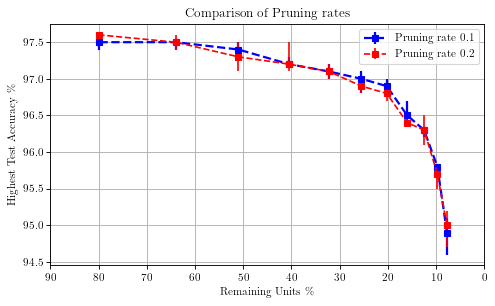

In [55]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean_prun['units_left_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()
y_1=(df_mean_prun['mean_test_acc'][df_mean_prun['pruning_rate']==0.1]*100).to_numpy()
y_1_min=(df_min_prun['mean_test_acc'][df_min_prun['pruning_rate']==0.1]*100).to_numpy()
y_1_max=(df_max_prun['mean_test_acc'][df_max_prun['pruning_rate']==0.1]*100).to_numpy()

y_2=(df_mean_prun['mean_test_acc'][df_mean_prun['pruning_rate']==0.2]*100).to_numpy()
y_2_min=(df_min_prun['mean_test_acc'][df_min_prun['pruning_rate']==0.2]*100).to_numpy()
y_2_max=(df_max_prun['mean_test_acc'][df_max_prun['pruning_rate']==0.2]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]
yerr_2=[y_2-y_2_min,y_2_max-y_2]

plt.title('Comparison of Pruning rates')
plt.xlabel('Remaining Units \%')
plt.ylabel('Highest Test Accuracy \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Pruning rate 0.1',color='b',linewidth=2,linestyle='--')
plt.errorbar(x_1,y_2,yerr=yerr_2,marker='s',label='Pruning rate 0.2',color='r',linestyle='--')

plt.xlim(90,0)
#plt.ylim(0,90)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()

plt.show()

## Observation

Although it seems like pruning 0.2 has the upper hand voting system might solve this

We will conduct the same voting system as the strategy

In [56]:
str1=np.sum(df_mean_prun['mean_test_acc'][df_mean_prun['pruning_rate']==0.1].to_numpy()>df_mean_prun['mean_test_acc'][df_mean_prun['pruning_rate']==0.2].to_numpy())
str2=np.sum(df_mean_prun['mean_test_acc'][df_mean_prun['pruning_rate']==0.1].to_numpy()<df_mean_prun['mean_test_acc'][df_mean_prun['pruning_rate']==0.2].to_numpy())

print('For the Test Accuracy:')
print('pruning rate 0.1: {}, pruning rate 0.2: {}'.format(str1,str2))


For the Test Accuracy:
pruning rate 0.1: 5, pruning rate 0.2: 2


In [57]:
str1=np.sum(df_mean_prun['mean_val_loss_iteration'][df_mean_prun['pruning_rate']==0.1].to_numpy()<df_mean_prun['mean_val_loss_iteration'][df_mean_prun['pruning_rate']==0.2].to_numpy())
str2=np.sum(df_mean_prun['mean_val_loss_iteration'][df_mean_prun['pruning_rate']==0.1].to_numpy()>df_mean_prun['mean_val_loss_iteration'][df_mean_prun['pruning_rate']==0.2].to_numpy())

print('For the Iteration:')
print('pruning rate 0.1: {}, pruning rate 0.2: {}'.format(str1,str2))


For the Iteration:
pruning rate 0.1: 7, pruning rate 0.2: 4


In [58]:
str1=np.sum(df_mean_prun['super_winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()>df_mean_prun['super_winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.2].to_numpy())
str2=np.sum(df_mean_prun['super_winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()<df_mean_prun['super_winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.2].to_numpy())

print('For the Super Winning Ticket Percentage:')
print('pruning rate 0.1: {}, pruning rate 0.2: {}'.format(str1,str2))

For the Super Winning Ticket Percentage:
pruning rate 0.1: 3, pruning rate 0.2: 3


In [59]:
str1=np.sum(df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()>df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.2].to_numpy())
str2=np.sum(df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.1].to_numpy()<df_mean_prun['winning_ticket_percentage'][df_mean_prun['pruning_rate']==0.2].to_numpy())

print('For the Winning Ticket Percentage:')
print('pruning rate 0.1: {}, pruning rate 0.2: {}'.format(str1,str2))


For the Winning Ticket Percentage:
pruning rate 0.1: 4, pruning rate 0.2: 7


## Results

We have a tie in the super winning ticket percentage.

However prun rate 0.2 has superiority over the winning tickets and computationally more feasible.

Thus it is selected

# Final Results

With Strategy 1 and Pruning Rate 0.2

## The Winning Ticket Percentage

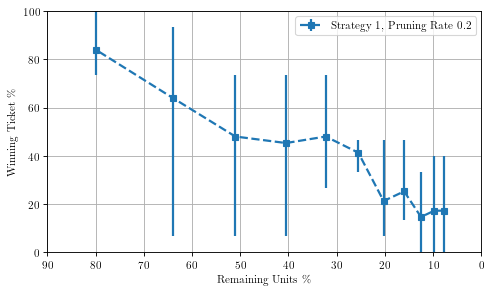

In [38]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=(df_mean['winning_ticket_percentage'][df_mean['strategy']==1]*100).to_numpy()
y_1_min=(df_min['winning_ticket_percentage'][df_min['strategy']==1]*100).to_numpy()
y_1_max=(df_max['winning_ticket_percentage'][df_max['strategy']==1]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]

plt.xlabel('Remaining Units \%')
plt.ylabel('Winning Ticket \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1, Pruning Rate 0.2',linewidth=2,linestyle='--')

plt.xlim(90,0)
plt.ylim(0,100)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()

plt.savefig('{}/Final_wt.png'.format(data_dirname))

plt.savefig('{}/Final_wt.pgf'.format(data_dirname))



plt.show()

## The Super Winning Ticket Percentage

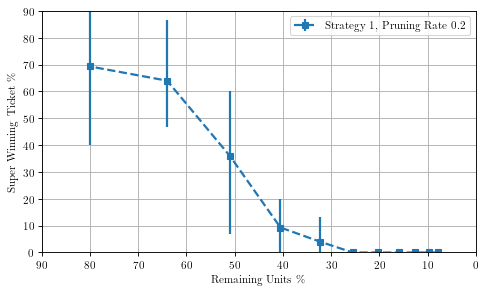

In [39]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=(df_mean['super_winning_ticket_percentage'][df_mean['strategy']==1]*100).to_numpy()
y_1_min=(df_min['super_winning_ticket_percentage'][df_min['strategy']==1]*100).to_numpy()
y_1_max=(df_max['super_winning_ticket_percentage'][df_max['strategy']==1]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]

plt.xlabel('Remaining Units \%')
plt.ylabel('Super Winning Ticket \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1, Pruning Rate 0.2',linewidth=2,linestyle='--')

plt.xlim(90,0)
plt.ylim(0,90)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()


plt.savefig('{}/Final_swt.png'.format(data_dirname))

plt.savefig('{}/Final_swt.pgf'.format(data_dirname))


plt.show()

## The Minimum Validation Loss Iteration

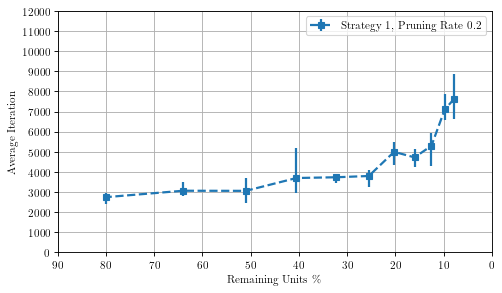

In [40]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=df_mean['mean_val_loss_iteration'][df_mean['strategy']==1].to_numpy()
y_1_min=df_min['mean_val_loss_iteration'][df_min['strategy']==1].to_numpy()
y_1_max=df_max['mean_val_loss_iteration'][df_max['strategy']==1].to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]

plt.xlabel('Remaining Units \%')
plt.ylabel('Average Iteration')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1, Pruning Rate 0.2',linewidth=2,linestyle='--')

plt.xlim(90,0)
#plt.ylim(0,10000)

plt.xticks(np.arange(0,100,10))
plt.yticks(np.arange(0,13000,1000))
plt.legend(loc='best')
plt.grid()

plt.savefig('{}/Final_iteration.png'.format(data_dirname))

plt.savefig('{}/Final_iteration.pgf'.format(data_dirname))

plt.show()

## The Test Accuracy

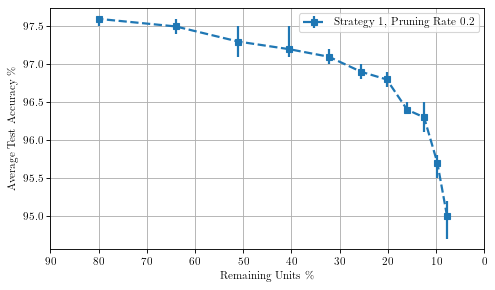

In [41]:


fig=plt.figure(figsize=(7, 4), dpi= 80, facecolor='w', edgecolor='k')

x_1=df_mean['units_left_percentage'][df_mean['strategy']==1].to_numpy()
y_1=(df_mean['mean_test_acc'][df_mean['strategy']==1]*100).to_numpy()
y_1_min=(df_min['mean_test_acc'][df_min['strategy']==1]*100).to_numpy()
y_1_max=(df_max['mean_test_acc'][df_max['strategy']==1]*100).to_numpy()

yerr_1=[y_1-y_1_min,y_1_max-y_1]

plt.xlabel('Remaining Units \%')
plt.ylabel('Average Test Accuracy \%')

plt.errorbar(x_1,y_1,yerr=yerr_1,marker='s',label='Strategy 1, Pruning Rate 0.2',linewidth=2,linestyle='--')

plt.xlim(90,0)
#plt.ylim(0,90)

plt.xticks(np.arange(0,100,10))

plt.legend()
plt.grid()

plt.savefig('{}/Final_acc.png'.format(data_dirname))

plt.savefig('{}/Final_acc.pgf'.format(data_dirname))


plt.show()